In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
os.getcwd()


'C:\\Users\\melis\\OneDrive\\Escritorio\\Portafolio\\Project1-indication-analysis\\notebooks'

In [5]:
# Read CSV and show headers
indications = pd.read_csv("../data/faers_indications.csv")

indications.head()

,Unnamed: 0,drug_labels,drug_rxcui,indications_label,indications_mondo,indications_umls
0,0,Cefepime|CEFEPIME HYDROCHLORIDE|CEFEPIME HYDROCHLORIDE.|CEFEPIME INJECTION|MAXIPIME,20481,Pneumonia|Osteomyelitis|Urinary tract infection,MONDO:0005249|MONDO:0005246|MONDO:0005247,C0032285|C0029443|C0042029
1,1,ALAWAY|KETOTIFEN|KETOTIFEN FUMARATE.|ZADITOR,6146,Hypersensitivity,MONDO:0005271,C0020517
2,2,BUDESONIDE NASAL SPRAY|ENTOCORT|PULMICORT|RHINOCORT|UCERIS,19831,Colitis ulcerative|Crohn's disease|Colitis microscopic|Colitis,MONDO:0005101|MONDO:0005011|MONDO:0000702|MONDO:0005292,C0009324|C0010346|C0400821|C0009319
3,3,OSELTAMIVIR|OSELTAMIVIR PHOSPHATE|OSELTAMIVIR PHOSPHATE.|TAMIFLU,260101,Influenza|H1N1 influenza,MONDO:0013855|MONDO:0005460,C0021400|C2076600
4,4,Cefpodoxime|CEFPODOXIME PROXETIL|CEFPODOXIME PROXETIL.,20489,NaN,NaN,NaN


In [6]:
# Review data structure
indications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1226 non-null   int64 
 1   drug_labels        1226 non-null   object
 2   drug_rxcui         1226 non-null   int64 
 3   indications_label  805 non-null    object
 4   indications_mondo  805 non-null    object
 5   indications_umls   805 non-null    object
dtypes: int64(2), object(4)
memory usage: 57.6+ KB


In [7]:
# Understanding the columns

indications.columns

#drug_labels → drug names (separated by |)
#drug_rxcui → RxNorm identifier
#indications_label → diseases/conditions
#indications_mondo → MONDO ontology
#indications_umls → UMLS ontology

Index(['Unnamed: 0', 'drug_labels', 'drug_rxcui', 'indications_label',
       'indications_mondo', 'indications_umls'],
      dtype='object')

In [8]:
#Data Cleaning
indications["drug_list"] = indications["drug_labels"].str.split("|")
indications["indication_list"] = indications["indications_label"].str.split("|")


In [9]:
# Primary drug name for readability (first label)
indications["drug_name"] = indications["drug_list"].str[0]

In [10]:
indications[["drug_name", "indication_list"]].head()

,drug_name,indication_list
0,Cefepime,"[Pneumonia, Osteomyelitis, Urinary tract infection]"
1,ALAWAY,[Hypersensitivity]
2,BUDESONIDE NASAL SPRAY,"[Colitis ulcerative, Crohn's disease, Colitis microscopic, Colitis]"
3,OSELTAMIVIR,"[Influenza, H1N1 influenza]"
4,Cefpodoxime,NaN


In [11]:
# Analyze the data coverage

len(indications["indication_list"])

1226

In [12]:
indications["has_indication_data"] = indications["indication_list"].notna()

In [13]:
indications["has_indication_data"].value_counts()

has_indication_data
True     805
False    421
Name: count, dtype: int64

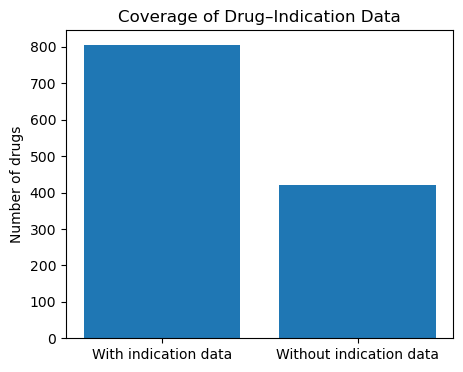

In [14]:
coverage = indications["has_indication_data"].value_counts()

plt.figure(figsize=(5,4))
plt.bar(
    ["With indication data", "Without indication data"],
    coverage.values
)
plt.ylabel("Number of drugs")
plt.title("Coverage of Drug–Indication Data")
plt.show()

In [15]:
#34% of the drugs in the dataset do not have recorded indication information.  
#This reflects limitations in data coverage rather than the absence of clinical indications.
#All records were preserved in the analysis to maintain transparency regarding dataset completeness.


In [16]:
## Number of indications per drug ##

In [17]:
def count_elements(lista):
    if isinstance(lista, list):
        return len(lista)
    else:
        return 0

indications["n_indications"] = indications["indication_list"].apply(count_elements)

In [18]:
indications[["indication_list", "n_indications"]].head(10)

,indication_list,n_indications
0,"[Pneumonia, Osteomyelitis, Urinary tract infection]",3
1,[Hypersensitivity],1
2,"[Colitis ulcerative, Crohn's disease, Colitis microscopic, Colitis]",4
3,"[Influenza, H1N1 influenza]",2
4,NaN,0
5,"[Urinary tract infection, Osteomyelitis]",2
6,"[Crohn's disease, Colitis ulcerative, Rheumatoid arthritis, Ankylosing spondylitis, Psoriatic arthropathy, Inflammatory bowel disease, Psoriasis, Colitis, Behcet's syndrome, Hidradenitis, Sarcoidosis, Juvenile idiopathic arthritis, Arthritis, Uveitis, Spondylitis, Pyoderma gangrenosum, Spondyloarthropathy, Kawasaki's disease, Takayasu's arteritis, Gastrointestinal disorder, Polyarthritis, Irritable bowel syndrome]",22
7,"[Chronic obstructive pulmonary disease, Asthma, Emphysema, Bronchitis, Lung disorder, Crohn's disease, Colitis microscopic, Bronchitis chronic, Respiratory disorder, Pneumonia, Colitis ulcerative]",11
8,[Malignant melanoma],1
9,"[Tuberculosis, Pulmonary tuberculosis, Mycobacterium avium complex infection]",3


In [19]:
indications["n_indications"].describe()

count    1226.000000
mean        3.243883
std         5.945060
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        60.000000
Name: n_indications, dtype: float64

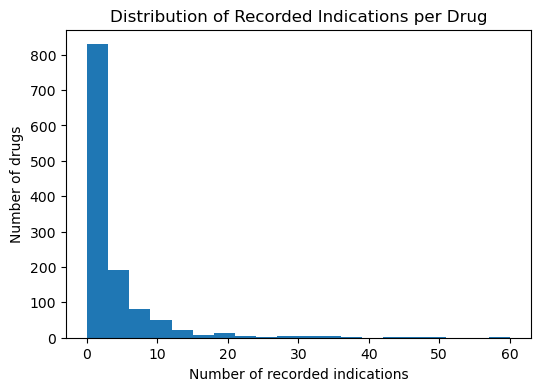

In [20]:
plt.figure(figsize=(6,4))
plt.hist(indications["n_indications"], bins=20)
plt.xlabel("Number of recorded indications")
plt.ylabel("Number of drugs")
plt.title("Distribution of Recorded Indications per Drug")
plt.show()

In [21]:
## Number of recorded indications per drug

#The distribution shows that a substantial proportion of drugs have zero recorded indications in this dataset.
#This reflects limitations in data coverage rather than the absence of clinical indications.

#Subsequent analyses focus on drugs with available indication data.

In [22]:
with_indications = indications[indications["n_indications"] > 0]

In [23]:
# Top Drugs by indications

top_drugs_clean = (
    with_indications[["drug_name", "drug_list", "n_indications"]]
    .sort_values(by="n_indications", ascending=False)
    .head(10)
)

top_drugs_clean

,drug_name,drug_list,n_indications
865,Avastin,"[Avastin, Bevacizumab, BEVACIZUMAB.]",60
253,NIVOLUMAB,"[NIVOLUMAB, OPDIVO]",50
208,RITUXAN,"[RITUXAN, RITUXAN HYCELA, RITUXIMAB, RITUXIMAB.]",46
428,METHOTREXATE,"[METHOTREXATE, METHOTREXATE 2.5 MG, METHOTREXATE INJECTION, METHOTREXATE SODIUM, METHOTREXATE SODIUM., METHOTREXATE., OTREXUP, RASUVO, Rheumatrex]",43
678,CARBOPLATIN,"[CARBOPLATIN, CARBOPLATIN.]",42
204,LENALIDOMIDE,"[LENALIDOMIDE, LENALIDOMIDE 5 MG, REVLIMID]",37
424,BLEPHAMIDE,"[BLEPHAMIDE, ORAPRED, PRED FORTE, Pred Mild, PREDNISOLONE, PREDNISOLONE ACETATE, PREDNISOLONE ACETATE., PREDNISOLONE ORAL SOLUTION, PREDNISOLONE SODIUM PHOSPHATE, PREDNISOLONE SODIUM PHOSPHATE., PREDNISOLONE.]",36
1032,ADALIMUMAB,"[ADALIMUMAB, HUMIRA]",35
160,GEMCITABINE,"[GEMCITABINE, Gemcitabine Hydrochloride, GEMCITABINE HYDROCHLORIDE., GEMCITABINE INJECTION, GEMZAR]",35
950,ADRIAMYCIN,"[ADRIAMYCIN, DOXORUBICIN, DOXORUBICIN HYDROCHLORIDE, DOXORUBICIN HYDROCHLORIDE.]",34


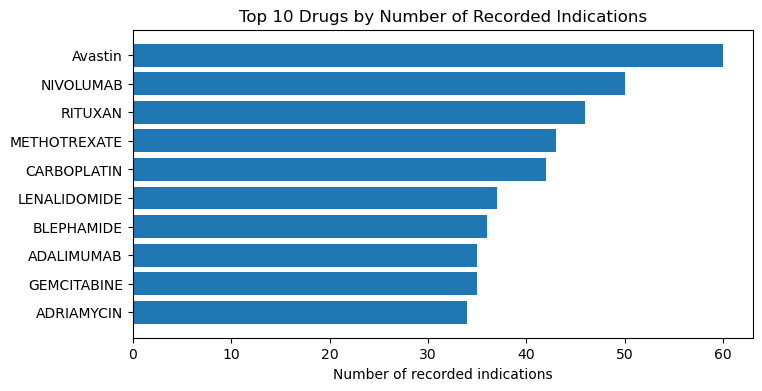

In [24]:
plt.figure(figsize=(8,4))
plt.barh(top_drugs_clean["drug_name"], top_drugs_clean["n_indications"])
plt.xlabel("Number of recorded indications")
plt.title("Top 10 Drugs by Number of Recorded Indications")
plt.gca().invert_yaxis()
plt.show()

In [25]:
#Most Common Clinical Indications

#Objective: To identify the most frequently occurring clinical indications in the dataset, considering only drugs with valid data.

In [26]:
with_indications = indications[indications["n_indications"] > 0]


In [27]:
all_indications = with_indications["indication_list"].explode()
all_indications.head(10)

0                  Pneumonia
0              Osteomyelitis
0    Urinary tract infection
1           Hypersensitivity
2         Colitis ulcerative
2            Crohn's disease
2        Colitis microscopic
2                    Colitis
3                  Influenza
3             H1N1 influenza
Name: indication_list, dtype: object

In [28]:
top_indications = all_indications.value_counts().head(10)
top_indications


indication_list
Hypertension                             61
Neoplasm malignant                       60
Depression                               50
Breast cancer                            42
Rheumatoid arthritis                     41
Lung neoplasm malignant                  36
Chronic obstructive pulmonary disease    33
Anxiety                                  33
Acute myeloid leukaemia                  33
Bipolar disorder                         32
Name: count, dtype: int64

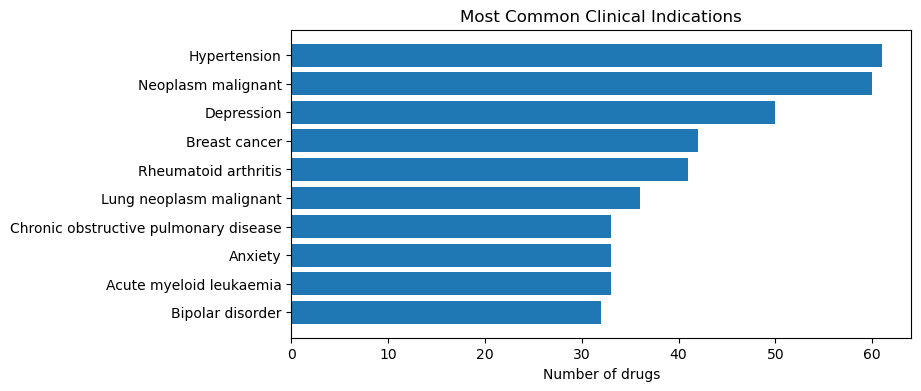

In [29]:
plt.figure(figsize=(8,4))
plt.barh(top_indications.index, top_indications.values)
plt.xlabel("Number of drugs")
plt.title("Most Common Clinical Indications")
plt.gca().invert_yaxis()
plt.show()


In [30]:
# Most common clinical indications

## The most frequent indications reflect conditions commonly treated across multiple drugs in the dataset.
## These counts represent how often an indication appears across drug records and do not reflect disease prevalence or treatment effectiveness.

## The results highlight the structure and focus of the available drug–indication data.


In [31]:
# Drugs with Broad vs Narrow Indication Profiles 

## Question: Are most drugs associated with few indications, or are there some with multiple indications?


def indication_profile(n):
    if n == 1:
        return "Single indication"
    elif n <= 3:
        return "Few indications (2–3)"
    else:
        return "Multiple indications (>3)"

with_indications["indication_profile"] = with_indications["n_indications"].apply(indication_profile)

with_indications["indication_profile"].value_counts()

indication_profile
Multiple indications (>3)    325
Single indication            265
Few indications (2–3)        215
Name: count, dtype: int64

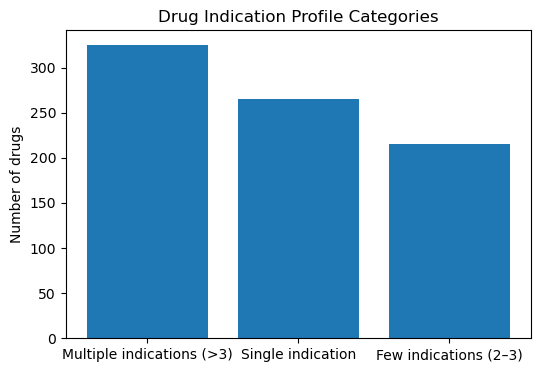

In [32]:
profile_counts = with_indications["indication_profile"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(profile_counts.index, profile_counts.values)
plt.ylabel("Number of drugs")
plt.title("Drug Indication Profile Categories")
plt.show()

In [2]:
## Final conclusions

## This exploratory analysis examined drug–indication associations derived from the FDA Adverse Event Reporting System (FAERS) and structured using standardized clinical ontologies (RxNorm, UMLS, and MONDO).

## The dataset reflects how drug indications are recorded and normalized from FAERS reports, rather than real-world treatment effectiveness, disease prevalence, or clinical outcomes. As such, the analysis is descriptive and intended to explore data structure, coverage, and indication diversity.

## Most drugs with available data are associated with a small number of recorded indications, while a limited subset shows broader indication profiles. A substantial proportion of drugs lack recorded indication information, highlighting limitations in dataset coverage rather than the absence of clinical use.

## Careful handling of missing values and label standardization was required to ensure interpretability and accurate visualization. Overall, this dataset is well suited for exploratory analysis, data quality assessment, and ontology-based healthcare analytics, but it is not appropriate for causal inference, risk estimation, or clinical decision-making.
